## Name : Asmaul Hossain Akash
## ID: 20-44209-3
### Assignment on Image Classification on CIFAR-10 dataset
- Dataset consists of 60,000 32x32 color images, ie 6000 images per class. 
- We need to design a model to predict the label of these images correctly. 
- Data Source: https://github.com/YoongiKim/CIFAR-10-images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

### Importing CIFAR-10 dataset using TensorFlow

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


### Visualizing Data

In [4]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

In [5]:
def get_ten_random_images():
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

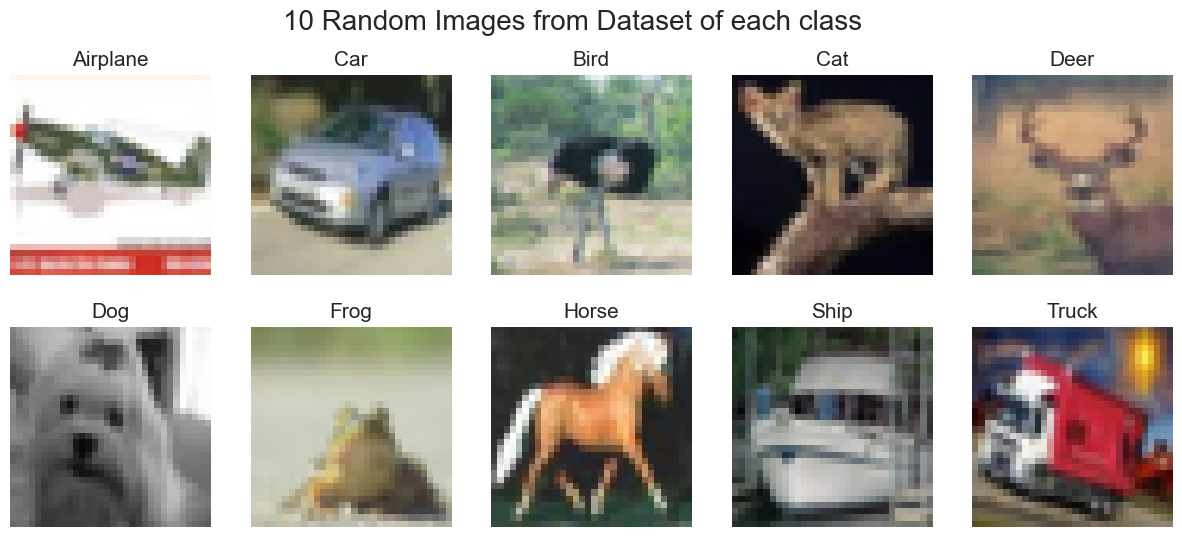

In [6]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

### Data Modeling

In [7]:
import keras

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### Mean shifting and converting variables into matrix

In [9]:
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [10]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [11]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [12]:
input_shape = X_train.shape[1:]

In [13]:
input_shape

(32, 32, 3)

## Training

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [15]:
weight_decay = 1e-4

In [16]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

In [19]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
625/625 [==============================] - 120s 190ms/step - loss: 1.8348 - accuracy: 0.4522 - val_loss: 1.1490 - val_accuracy: 0.6228
Epoch 2/50
625/625 [==============================] - 119s 191ms/step - loss: 1.1485 - accuracy: 0.6372 - val_loss: 0.9526 - val_accuracy: 0.7005
Epoch 3/50
625/625 [==============================] - 119s 191ms/step - loss: 0.9584 - accuracy: 0.6959 - val_loss: 0.8196 - val_accuracy: 0.7376
Epoch 4/50
625/625 [==============================] - 112s 179ms/step - loss: 0.8515 - accuracy: 0.7350 - val_loss: 0.8039 - val_accuracy: 0.7546
Epoch 5/50
625/625 [==============================] - 112s 179ms/step - loss: 0.7849 - accuracy: 0.7597 - val_loss: 0.7188 - val_accuracy: 0.7849
Epoch 6/50
625/625 [==============================] - 112s 179ms/step - loss: 0.7277 - accuracy: 0.7785 - val_loss: 0.6927 - val_accuracy: 0.7930
Epoch 7/50
625/625 [==============================] - 112s 180ms/step - loss: 0.6774 - accuracy: 0.8000 - val_loss: 0.7264 -

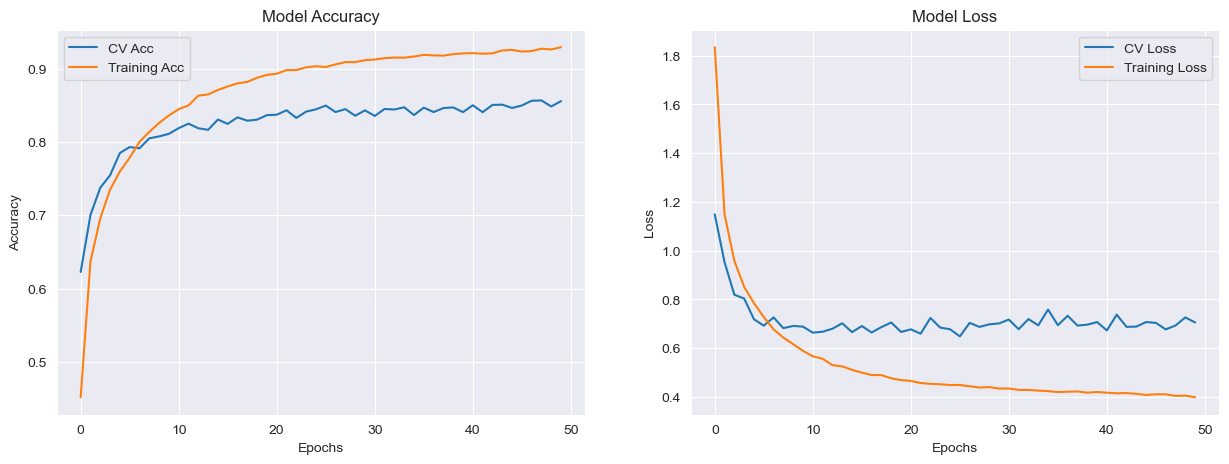

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### Model Evaluation

In [29]:
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

79/79 [==============================] - 7s 88ms/step - loss: 0.7414 - accuracy: 0.8441


In [30]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 84.41%


###### Tensorflow-CPU was used, could not activate GPU